In [25]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file
df= pd.read_csv('/content/final_model_data.csv')

In [27]:
#show DF
df.head()

,Unnamed: 0.1,Unnamed: 0,Model,Oversample,Scaler,Neighbors,precision,recall,f1-score,support
0,0,Active,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.989067,0.766646,0.863768,3304.000000
1,1,Inactive,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.471193,0.960839,0.632306,715.000000
2,2,accuracy,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.801194,0.801194,0.801194,0.801194
3,3,macro avg,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.730130,0.863743,0.748037,4019.000000
4,4,weighted avg,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.896935,0.801194,0.822590,4019.000000


In [28]:
# Shorten SVM
df.replace("Support Vector Machines (SVM)","SVM",inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,Model,Oversample,Scaler,Neighbors,precision,recall,f1-score,support
0,0,Active,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.989067,0.766646,0.863768,3304.000000
1,1,Inactive,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.471193,0.960839,0.632306,715.000000
2,2,accuracy,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.801194,0.801194,0.801194,0.801194
3,3,macro avg,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.730130,0.863743,0.748037,4019.000000
4,4,weighted avg,K-Nearest Neighbors (kNN),False,"RobustScaler(quantile_range=(25, 75))",9,0.896935,0.801194,0.822590,4019.000000


In [29]:
accuracy_df = df[df['Unnamed: 0'] == 'accuracy']

In [30]:
# Extract the accuracy values
accuracy_values = accuracy_df['precision'].tolist()
print(accuracy_values) 

[0.8011943269470018, 0.7882557850211496, 0.929584473749689, 0.7942274197561583, 0.7810400597163474, 0.7847723314257278, 0.7773077880069669, 0.9308285643194824, 0.9300821099776064, 0.8079124160238865, 0.8437422244339388, 0.8260761383428714, 0.928589201293854, 0.8857924856929584, 0.8576760388156258, 0.8815625777556606, 0.9470017417267976, 0.795222692211993, 0.767355063448619, 0.7982085095794974, 0.8233391390893257, 0.8357800447872605, 0.937795471510326, 0.8517044040806171, 0.9338143816869868, 0.9437671062453348, 0.7633739736252799, 0.8452351331176909, 0.8006966907190843, 0.8402587708385171, 0.8556854939039562, 0.8305548643941278, 0.8136352326449365, 0.8392634983826822, 0.9355561084846976, 0.778054242348843, 0.8285643194824583, 0.7066434436426972, 0.81487932321473, 0.8188604130380692, 0.7947250559840756, 0.8113958696193083, 0.8424981338641453, 0.876337397362528, 0.7815376959442647, 0.7912416023886539, 0.8519532221945758, 0.7758148793232147, 0.842746951978104, 0.7947250559840756, 0.8407564

In [31]:
# Calculate the average accuracy
average_accuracy = sum(accuracy_values) / len(accuracy_values)

In [32]:
# Print the average accuracy
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.8267797959691462


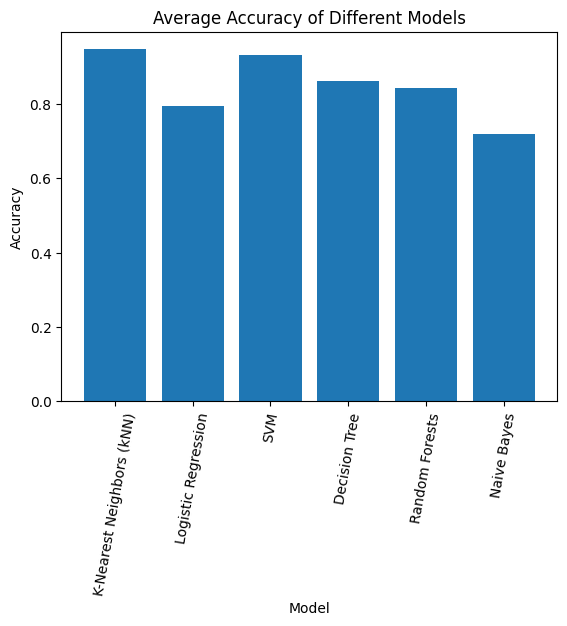

In [40]:

# Create a bar graph to visualize the average accuracy of different models
model_names = accuracy_df['Model'].tolist()


plt.bar(model_names, accuracy_values)
plt.title('Average Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=80)
plt.tight_layout
plt.show()

In [34]:
#List all F1 values from accuracy row 
f1_values = accuracy_df['f1-score'].tolist()
print(f1_values) 


[0.8011943269470018, 0.7882557850211496, 0.929584473749689, 0.7942274197561583, 0.7810400597163474, 0.7847723314257278, 0.7773077880069669, 0.9308285643194824, 0.9300821099776064, 0.8079124160238865, 0.8437422244339388, 0.8260761383428714, 0.928589201293854, 0.8857924856929584, 0.8576760388156258, 0.8815625777556606, 0.9470017417267976, 0.795222692211993, 0.767355063448619, 0.7982085095794974, 0.8233391390893257, 0.8357800447872605, 0.937795471510326, 0.8517044040806171, 0.9338143816869868, 0.9437671062453348, 0.7633739736252799, 0.8452351331176909, 0.8006966907190843, 0.8402587708385171, 0.8556854939039562, 0.8305548643941278, 0.8136352326449365, 0.8392634983826822, 0.9355561084846976, 0.778054242348843, 0.8285643194824583, 0.7066434436426972, 0.81487932321473, 0.8188604130380692, 0.7947250559840756, 0.8113958696193083, 0.8424981338641453, 0.876337397362528, 0.7815376959442647, 0.7912416023886539, 0.8519532221945758, 0.7758148793232147, 0.842746951978104, 0.7947250559840756, 0.8407564

In [35]:
# Calculate the average f1
average_f1 = sum(f1_values) / len(f1_values)
print("Average F-1 Score:", average_f1) 


Average F-1 Score: 0.8267797959691462


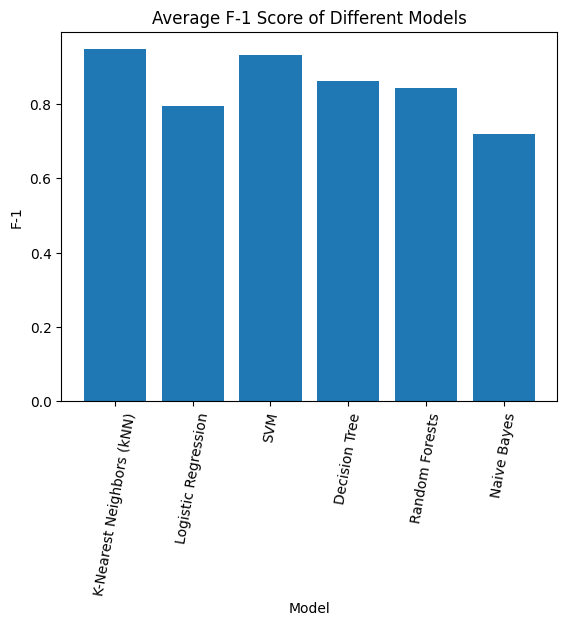

In [38]:
# Create a bar graph to visualize the average accuracy of different models
model_names = accuracy_df['Model'].tolist()

plt.bar(model_names, f1_values)
plt.title('Average F-1 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('F-1')
plt.xticks(rotation=80)
plt.tight_layout
plt.show()

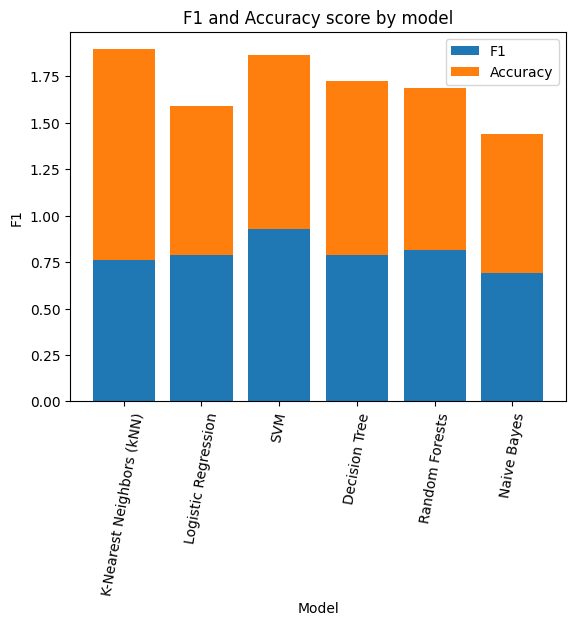

In [39]:
# create stacked bar chart

model_names = accuracy_df['Model'].tolist()
f1_values = accuracy_df['f1-score'].tolist()
accuracy_values = accuracy_df['precision'].tolist()

plt.bar(model_names, f1_values, label='F1')
plt.bar(model_names, accuracy_values, bottom=f1_values, label='Accuracy')
plt.title('F1 and Accuracy score by model')
plt.xlabel('Model')
plt.ylabel('F1')
plt.xticks(rotation=80)
plt.legend()
plt.tight_layout
plt.show()